https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

> ### Data Import, Refining and Classification according to Algorithm

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df= pd.read_csv("temps.csv")
df=df.drop(['forecast_noaa','forecast_acc','forecast_under'],axis=1)

df =pd.get_dummies(df)



# I was getting a outlier value in temp_1 in final plotting, so I find and delete the entire row
s = df.temp_1 > 100
e=df.loc[s,'temp_1']
print("This index with value is creating problem in final graph",e)
df = df.drop(286)

X= df.drop("actual",axis=1)
#y=df.pop('actual')
y=df.iloc[:, 6:7]



This index with value is creating problem in final graph 286    117
Name: temp_1, dtype: int64


> ### Splitting and Data Training

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=50)
model.fit(X,y)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

C:\Users\dell7450\AppData\Local\Temp/ipykernel_11020/137745024.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


Training Features Shape: (277, 14)
Training Labels Shape: (277, 1)
Testing Features Shape: (70, 14)
Testing Labels Shape: (70, 1)


 ### Accuracy (X-test,y_test)

In [17]:
score = model.score(X_test,y_test)
print("The accuracy score with 80-20 (X_test) and (y_test) is ",score)

The accuracy score with 80-20 (X_test) and (y_test) is  0.9652858761430959


### Metric Accuracy (y_test, predictions)

In [18]:
# not possible in regressive data

> ### Plot (not so accurate)

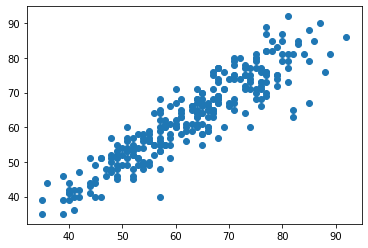

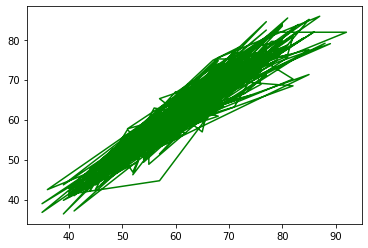

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_train.temp_1 , y_train)
plt.show()
plt.plot(X_train.temp_1, model.predict(X_train), color='green')

> ## Baba g mera qs hay 
> <span style="color:red"> Confusion matrix sirf classification data par hota hay ? Agar me ghalat hon tu please correct karen Peer sab </span>

In [20]:
# from sklearn.metrics import confusion_matrix
# predictions = model.predict(X_test)
# cm= confusion_matrix(y_test, predictions)
# cm